week 1


In [180]:
!pip install faker

In [181]:
import numpy as np
import pandas as pd
import random
from faker import Faker
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import pickle

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import  f1_score, roc_auc_score, classification_report,ConfusionMatrixDisplay,confusion_matrix
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [182]:

from datetime import datetime, timedelta

# Categories, statuses, priorities
categories = ['Development', 'Design', 'Testing', 'Documentation', 'Deployment']
statuses = ['Pending', 'In Progress', 'Completed']
priorities = ['Low', 'Medium', 'High']
employees = ['Ava', 'Liam', 'Noah', 'Emma', 'Olivia', 'Sophia', 'James', 'Mia', 'Lucas', 'Isabella']

# Keyword clues for each category
keywords = {
    'Development': ['API', 'backend', 'database', 'feature', 'module', 'logic', 'function'],
    'Design': ['UI', 'UX', 'layout', 'color', 'banner', 'mockup', 'design'],
    'Testing': ['bug', 'test', 'validation', 'QA', 'error', 'performance', 'cases'],
    'Documentation': ['guide', 'manual', 'docs', 'instructions', 'notes', 'reference', 'summary'],
    'Deployment': ['server', 'deploy', 'CI/CD', 'container', 'environment', 'production', 'cloud']
}

data = []
for i in range(1, 1501):  # 1500 samples
    category = random.choice(categories)

    # Make estimated hours dependent on category
    if category == 'Development':
        hours = random.randint(10, 40)
    elif category == 'Testing':
        hours = random.randint(8, 25)
    elif category == 'Design':
        hours = random.randint(5, 20)
    elif category == 'Documentation':
        hours = random.randint(2, 10)
    else:  # Deployment
        hours = random.randint(8, 30)

    # Priority is based on hours and category
    if hours > 25:
        priority = 'High'
    elif hours > 10:
        priority = 'Medium'
    else:
        priority = 'Low'

    # Status depends on estimated hours
    if hours < 8:
        status = random.choice(['In Progress', 'Completed'])
    elif hours > 25:
        status = random.choice(['Pending', 'In Progress'])
    else:
        status = 'In Progress'

    # Smart task descriptions with category-specific words
    kw = random.sample(keywords[category], 2)
    desc = f"{category} task to handle {kw[0]} and {kw[1]}."

    # Logical deadline (shorter for low priority)
    if priority == 'High':
        deadline = datetime.today() + timedelta(days=random.randint(3, 10))
    elif priority == 'Medium':
        deadline = datetime.today() + timedelta(days=random.randint(10, 30))
    else:
        deadline = datetime.today() + timedelta(days=random.randint(30, 60))

    data.append({
        'Task_ID': i,
        'Task_Description': desc,
        'Deadline': deadline.strftime('%Y-%m-%d'),
        'Assigned_To': random.choice(employees),
        'Estimated_Hours': hours,
        'Category': category,
        'Status': status,
        'Priority': priority
    })

# Create dataframe
df = pd.DataFrame(data)
df.to_csv('smart_task_dataset.csv', index=False)
# print(df.head(10))
# print("\n✅ Smart synthetic dataset created with meaningful correlations.")



In [183]:
df=pd.read_csv('/content/smart_task_dataset.csv')
df

,Task_ID,Task_Description,Deadline,Assigned_To,Estimated_Hours,Category,Status,Priority
0,1,Design task to handle color and layout.,2025-11-08,Sophia,20,Design,In Progress,Medium
1,2,Deployment task to handle cloud and deploy.,2025-11-03,Ava,16,Deployment,In Progress,Medium
2,3,Development task to handle API and feature.,2025-10-31,Noah,13,Development,In Progress,Medium
3,4,Development task to handle database and API.,2025-10-16,Mia,28,Development,In Progress,High
4,5,Documentation task to handle manual and instru...,2025-12-05,Ava,10,Documentation,In Progress,Low
...,...,...,...,...,...,...,...,...
1495,1496,Documentation task to handle notes and guide.,2025-11-13,Noah,7,Documentation,Completed,Low
1496,1497,Testing task to handle test and bug.,2025-11-11,Emma,20,Testing,In Progress,Medium
1497,1498,Design task to handle mockup and UI.,2025-10-30,Sophia,18,Design,In Progress,Medium
1498,1499,Development task to handle database and backend.,2025-11-07,Noah,11,Development,In Progress,Medium


In [184]:
df.head()

,Task_ID,Task_Description,Deadline,Assigned_To,Estimated_Hours,Category,Status,Priority
0,1,Design task to handle color and layout.,2025-11-08,Sophia,20,Design,In Progress,Medium
1,2,Deployment task to handle cloud and deploy.,2025-11-03,Ava,16,Deployment,In Progress,Medium
2,3,Development task to handle API and feature.,2025-10-31,Noah,13,Development,In Progress,Medium
3,4,Development task to handle database and API.,2025-10-16,Mia,28,Development,In Progress,High
4,5,Documentation task to handle manual and instru...,2025-12-05,Ava,10,Documentation,In Progress,Low


In [185]:
df.drop(columns=['Task_ID','Deadline'], inplace=True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Task_Description  1500 non-null   object
 1   Assigned_To       1500 non-null   object
 2   Estimated_Hours   1500 non-null   int64 
 3   Category          1500 non-null   object
 4   Status            1500 non-null   object
 5   Priority          1500 non-null   object
dtypes: int64(1), object(5)
memory usage: 70.4+ KB


In [187]:
df.describe()

,Estimated_Hours
count,1500.000000
mean,15.729333
std,8.641944
min,2.000000
25%,9.000000
50%,15.000000
75%,21.000000
max,40.000000


In [188]:
df.isnull().sum()

,0
Task_Description,0
Assigned_To,0
Estimated_Hours,0
Category,0
Status,0
Priority,0


In [189]:
df.dtypes

,0
Task_Description,object
Assigned_To,object
Estimated_Hours,int64
Category,object
Status,object
Priority,object


In [190]:
df.columns

Index(['Task_Description', 'Assigned_To', 'Estimated_Hours', 'Category',
       'Status', 'Priority'],
      dtype='object')

Text(0.5, 1.0, 'Priority Distributions \n (0: High || 1: Low || 2:Medium)')

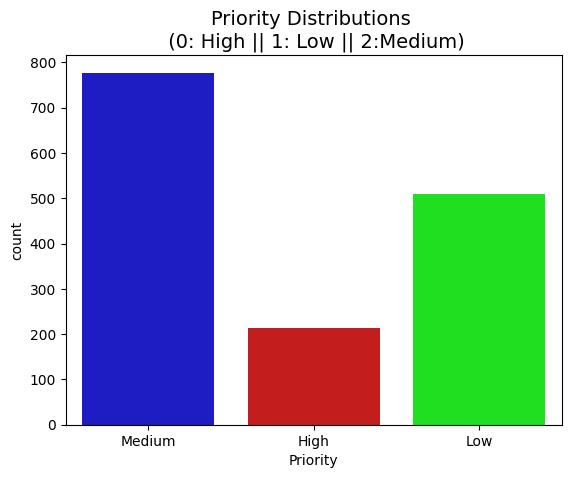

In [191]:
colors = ["#0101DF", "#DF0101","#00FF00"]

sns.countplot(x='Priority', data=df, palette=colors)
plt.title('Priority Distributions \n (0: High || 1: Low || 2:Medium)', fontsize=14)

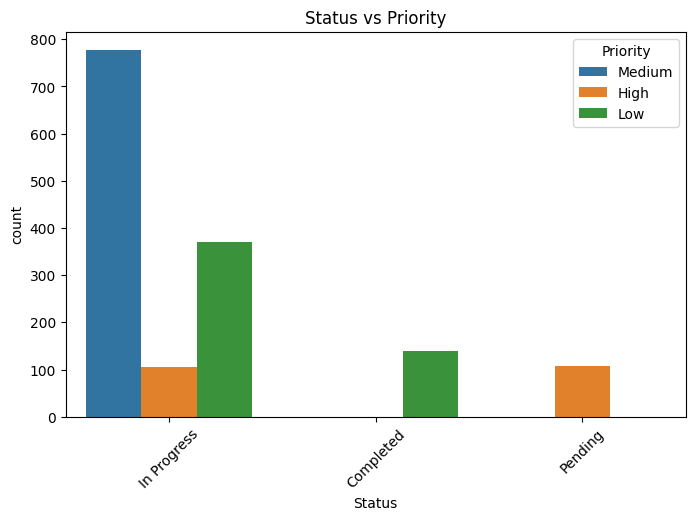

In [192]:
plt.figure(figsize=(8,5))
sns.countplot(x='Status', hue='Priority', data=df)
plt.title("Status vs Priority")
plt.xticks(rotation=45)
plt.show()

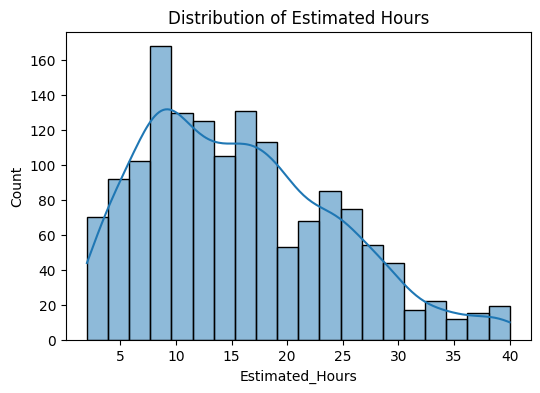

In [193]:
plt.figure(figsize=(6,4))
sns.histplot(df['Estimated_Hours'], kde=True, bins=20)
plt.title("Distribution of Estimated Hours")
plt.show()

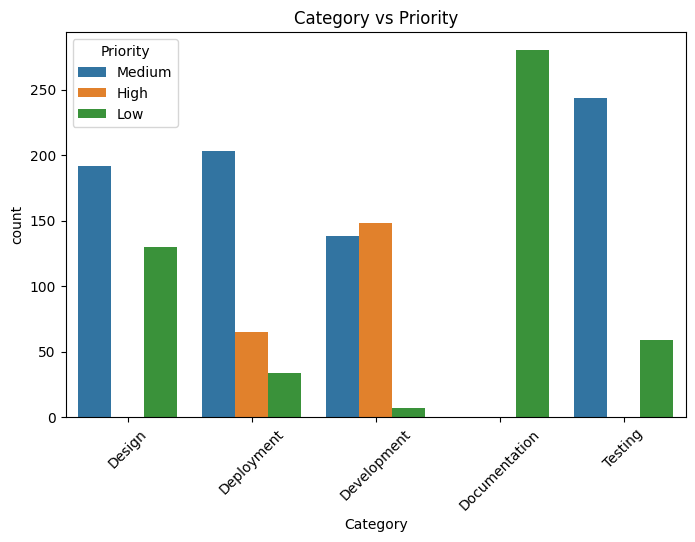

In [194]:
plt.figure(figsize=(8,5))
sns.countplot(x='Category', hue='Priority', data=df)
plt.title("Category vs Priority")
plt.xticks(rotation=45)
plt.show()

In [195]:
df['Task_Description']=df['Task_Description'].str.replace('[^a-zA-z0-9 ]',"",regex=True)
df['Task_Description']

,Task_Description
0,Design task to handle color and layout
1,Deployment task to handle cloud and deploy
2,Development task to handle API and feature
3,Development task to handle database and API
4,Documentation task to handle manual and instru...
...,...
1495,Documentation task to handle notes and guide
1496,Testing task to handle test and bug
1497,Design task to handle mockup and UI
1498,Development task to handle database and backend


In [196]:
nltk.download('punkt_tab')
nltk.download('stopwords')
ps=PorterStemmer()
df['Task_Description']=df['Task_Description'].apply(lambda row:[ps.stem(token.lower()) for token in nltk.word_tokenize(row)]).apply(lambda token:" ".join(token))
df['Task_Description']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Task_Description
0,design task to handl color and layout
1,deploy task to handl cloud and deploy
2,develop task to handl api and featur
3,develop task to handl databas and api
4,document task to handl manual and instruct
...,...
1495,document task to handl note and guid
1496,test task to handl test and bug
1497,design task to handl mockup and ui
1498,develop task to handl databas and backend


In [197]:
sw=stopwords.words('english')

In [198]:
df['Task_Description']=df['Task_Description'].apply(lambda row:[token for token in nltk.word_tokenize(row) if token not in sw]).apply(lambda token:" ".join(token))
df['Task_Description']

,Task_Description
0,design task handl color layout
1,deploy task handl cloud deploy
2,develop task handl api featur
3,develop task handl databas api
4,document task handl manual instruct
...,...
1495,document task handl note guid
1496,test task handl test bug
1497,design task handl mockup ui
1498,develop task handl databas backend


week 2

In [199]:
vec=TfidfVectorizer(stop_words='english')
data_vec=vec.fit_transform(df['Task_Description'])
print(data_vec)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7265 stored elements and shape (1500, 39)>
  Coords	Values
  (0, 11)	0.4139121500106455
  (0, 34)	0.16319947884866579
  (0, 20)	0.16319947884866579
  (0, 7)	0.615358657407039
  (0, 22)	0.6298748407698302
  (1, 34)	0.1510130531011
  (1, 20)	0.1510130531011
  (1, 10)	0.7853143960362332
  (1, 6)	0.5810950137149817
  (2, 34)	0.1618077013559741
  (2, 20)	0.1618077013559741
  (2, 12)	0.4256039399339188
  (2, 0)	0.6135907018903067
  (2, 17)	0.6245032205123348
  (3, 34)	0.16062718414917188
  (3, 20)	0.16062718414917188
  (3, 12)	0.4224988171853453
  (3, 0)	0.6091140646508851
  (3, 9)	0.6315636319058257
  (4, 34)	0.1589188272323119
  (4, 20)	0.1589188272323119
  (4, 14)	0.42519243345500246
  (4, 24)	0.6189961779077994
  (4, 21)	0.6209224903080597
  (5, 11)	0.41770458819004297
  :	:
  (1494, 19)	0.6221184726428624
  (1495, 34)	0.15815344873103832
  (1495, 20)	0.15815344873103832
  (1495, 14)	0.42314463865851226
  (1495, 27)	0.62183725

In [200]:
# df['Task_Description']=data_vec.toarray()
# df['Task_Description']

In [201]:
le_category = LabelEncoder()
df['Category']= le_category.fit_transform(df['Category'])

In [202]:
le_Priority = LabelEncoder()
df['Priority']= le_Priority.fit_transform(df['Priority'])

In [203]:
le_Status = LabelEncoder()
df['Status']= le_Status.fit_transform(df['Status'])

In [204]:
# cols=['Status','Category','Priority']
# encoder=LabelEncoder()
# for col in cols:
#   encoder.fit(df[col])
#   print(encoder.classes_)
#   df[col]=encoder.transform(df[col])

In [205]:
df

,Task_Description,Assigned_To,Estimated_Hours,Category,Status,Priority
0,design task handl color layout,Sophia,20,1,1,2
1,deploy task handl cloud deploy,Ava,16,0,1,2
2,develop task handl api featur,Noah,13,2,1,2
3,develop task handl databas api,Mia,28,2,1,0
4,document task handl manual instruct,Ava,10,3,1,1
...,...,...,...,...,...,...
1495,document task handl note guid,Noah,7,3,0,1
1496,test task handl test bug,Emma,20,4,1,2
1497,design task handl mockup ui,Sophia,18,1,1,2
1498,develop task handl databas backend,Noah,11,2,1,2


In [206]:
X=df[['Task_Description','Estimated_Hours','Category','Status']]
# print(X)
y=df['Category']
# print(y)

In [207]:
# scaler=MinMaxScaler()
# X_scaled=scaler.fit_transform(X)
# X_scaled

In [208]:
X_train, X_test, y_train, y_test = train_test_split(data_vec, y, test_size=0.2, random_state=42)

************ SVC() ************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        58

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


************ MultinomialNB() ************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        58

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
we

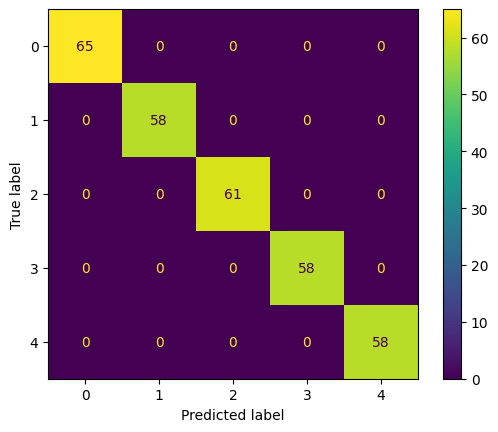

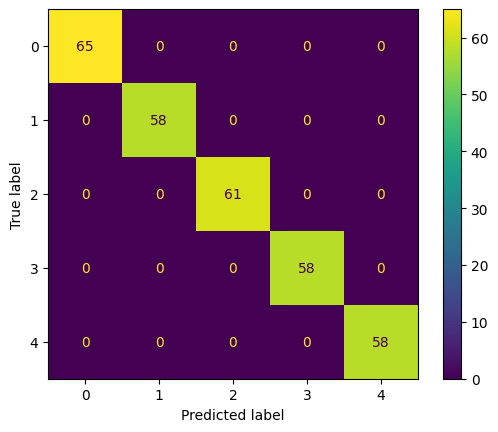

In [209]:
svc=SVC()
nb=MultinomialNB()
models=[svc,nb]
for model in models:
  print("************",model,"************")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print()


week 3

In [213]:
X_numeric = df[['Estimated_Hours','Category']].values
X = hstack((data_vec, X_numeric))
y=df['Priority']
# print(y)

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      0.99      1.00       146
           2       1.00      1.00      1.00       235

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450




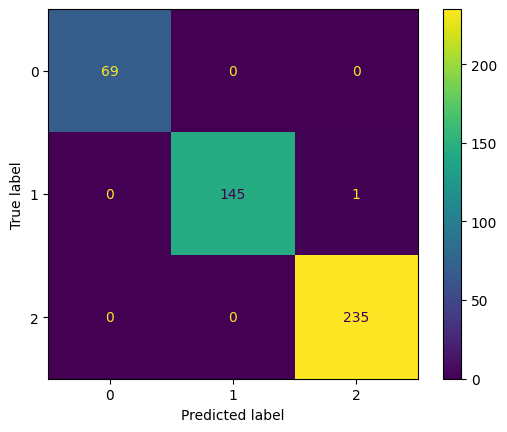

In [215]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print()

In [216]:
df['Priority'] = df['Priority'].map({'High': 1, 'Medium': 2, 'Low': 3})
df = df.sort_values(by=['Priority', 'Estimated_Hours'], ascending=[True, False])

team_members = ["Ryan", "julie", "john"]
workload = {member: 0 for member in team_members}
assignments = []

for _, task in df.iterrows():
    member = min(workload, key=workload.get)
    assignments.append(member)
    workload[member] += task['Estimated_Hours']

df['Assigned_To'] = assignments

print(df[['Task_Description', 'Priority', 'Estimated_Hours', 'Assigned_To']])
print("Workload Distribution:", workload)

                          Task_Description  Priority  Estimated_Hours  \
43          develop task handl api backend       NaN               40   
94        develop task handl databas modul       NaN               40   
230       develop task handl backend logic       NaN               40   
509        develop task handl function api       NaN               40   
771        develop task handl logic featur       NaN               40   
...                                    ...       ...              ...   
1209   document task handl manual instruct       NaN                2   
1234  document task handl instruct summari       NaN                2   
1408    document task handl manual summari       NaN                2   
1457      document task handl summari guid       NaN                2   
1475       document task handl manual note       NaN                2   

     Assigned_To  
43          Ryan  
94         julie  
230         john  
509         Ryan  
771        julie  
...      

In [219]:
# ---- Random Forest hyperparameter tuning ----
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
rf_best = grid_rf.best_estimator_

# ---- Support Vector Classifier ----
svc_params = {
    'C': [0.5, 1, 5],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}
grid_svc = GridSearchCV(SVC(), svc_params, cv=5, scoring='accuracy')
grid_svc.fit(X_train, y_train)
svc_best = grid_svc.best_estimator_

# ---- Naive Bayes ----

nb_params = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

grid_nb = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)
nb_best = grid_nb.best_estimator_

# ------------------ 9. Evaluate ------------------
models = {
    "Random Forest": rf_best,
    "SVC": svc_best,
    "Naive Bayes": nb_best
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Best Parameters:", model)
    # print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Random Forest Results:
Best Parameters: RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      0.99      1.00       146
           2       1.00      1.00      1.00       235

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450

Confusion Matrix:
 [[ 69   0   0]
 [  0 145   1]
 [  0   0 235]]

SVC Results:
Best Parameters: SVC(C=0.5, kernel='linear')
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00       235

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted

In [ ]:
# scaler.fit_transform(X)

In [ ]:
# pickle.dump(grid_rf,open('bestmodel1.sav','wb'))

In [220]:
pickle.dump(svc, open('task_classifier_model.pkl', 'wb'))
pickle.dump(rf, open('priority_model.pkl', 'wb'))
pickle.dump(vec, open('vectorizer.pkl', 'wb'))
pickle.dump(le_category, open('le_category.pkl', 'wb'))
pickle.dump(le_Priority, open('le_Priority.pkl', 'wb'))